In [1]:
import pandas as pd

flightdata = pd.read_csv('D:\CS588FinalProject\delayflight.csv')
flightdata.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N
3,11,25,6,1015,OO,DEN,MEM,872,N
4,10,7,6,1828,WN,MDW,OMA,423,Y


In [2]:
test = pd.read_csv('D:\CS588FinalProject\delaytest.csv')
test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,7,25,3,615,YV,MRY,PHX,598
1,4,17,2,739,WN,LAS,HOU,1235
2,12,2,7,651,MQ,GSP,ORD,577
3,3,25,7,1614,WN,BWI,MHT,377
4,6,6,3,1505,UA,ORD,STL,258


In [6]:
#This step is to convert string values into numeric values by encoding each column using label encoder.
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

flightdata['UniqueCarrier'] = le.fit_transform(flightdata['UniqueCarrier'])
flightdata['Origin'] = le.fit_transform(flightdata['Origin'])
flightdata['Dest'] = le.fit_transform(flightdata['Dest'])
X = flightdata.iloc[:,:-1].values
y = flightdata['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (100000, 8)
Shape of y (100000,)


explained variance ratio (first three components): [0.5808911  0.39826414]
explained variance ratio (first three components): [0.5808911  0.39826414 0.01053583]
PCA for 3 components


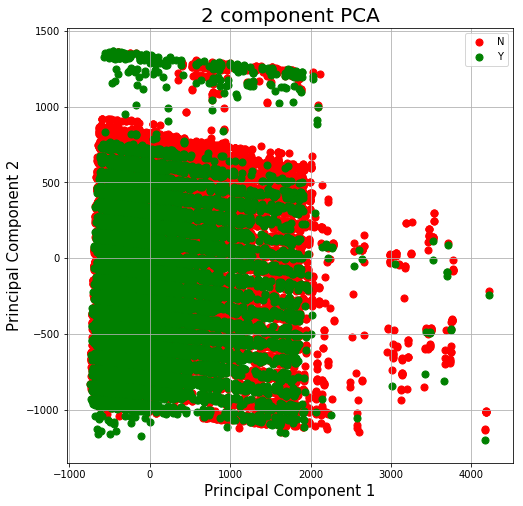

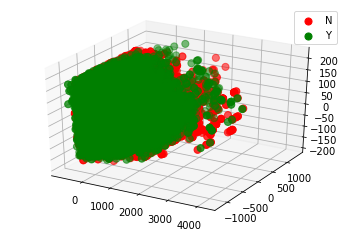

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from mpl_toolkits.mplot3d import Axes3D

pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca_2.explained_variance_ratio_))


pca_2_df = pd.DataFrame(data = X_pca_2
             , columns = ['principal component 1', 'principal component 2'])
final_pca_2_Df = pd.concat([pca_2_df, flightdata['dep_delayed_15min']], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['N', 'Y']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    delay = flightdata['dep_delayed_15min'] == target
    ax.scatter(final_pca_2_Df.loc[delay, 'principal component 1']
               , final_pca_2_Df.loc[delay, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

pca_3 = PCA(n_components=3)
X_PCA_3 = pca_3.fit_transform(X)

pca_3_df = pd.DataFrame(data = X_PCA_3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
final_pca_3_Df = pd.concat([pca_3_df, flightdata['dep_delayed_15min']], axis = 1)


# Percentage of variance explained for each components
print('explained variance ratio (first three components): %s'
      % str(pca_3.explained_variance_ratio_))

#'PCA for 3 components'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for target, color in zip(targets,colors):
    delay = flightdata['dep_delayed_15min'] == target
    ax.scatter(final_pca_3_Df.loc[delay, 'principal component 1']
               , final_pca_3_Df.loc[delay, 'principal component 2']
               , final_pca_3_Df.loc[delay, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)




Original number of features: (100000, 8)
Reduced number of features to 2: (100000, 2)
Reduced number of features to 3: (100000, 3)


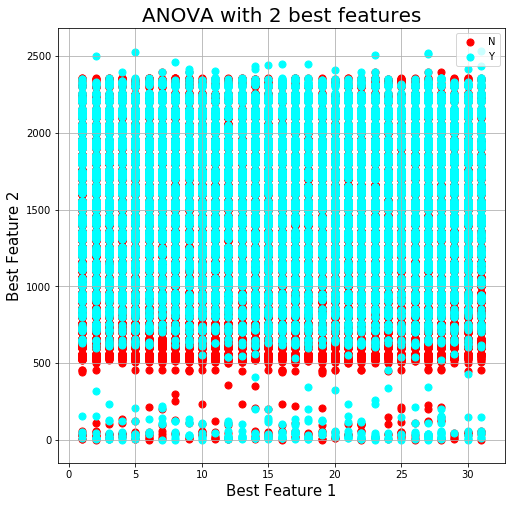

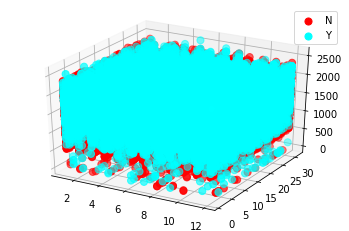

In [15]:
#feature scaling using ANOVA

# Load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create an SelectKBest object to select features with two best ANOVA F-Values = 2
fvalue_selector = SelectKBest(f_classif, k=2)

X_kbest_2 = fvalue_selector.fit_transform(X, y)

print('Original number of features:', X.shape)
print('Reduced number of features to 2:', X_kbest_2.shape)

anova_2_df = pd.DataFrame(data = X_kbest_2
             , columns = ['Best Feature 1', 'Best Feature 2'])
final_anova_2_Df = pd.concat([anova_2_df, flightdata['dep_delayed_15min']], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Best Feature 1', fontsize = 15)
ax.set_ylabel('Best Feature 2', fontsize = 15)
ax.set_title('ANOVA with 2 best features', fontsize = 20)
targets = ['N', 'Y']
colors = ['red', 'aqua']
for target, color in zip(targets,colors):
    delay = flightdata['dep_delayed_15min'] == target
    ax.scatter(final_anova_2_Df.loc[delay, 'Best Feature 1']
               , final_anova_2_Df.loc[delay, 'Best Feature 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Creating an SelectKBest object to select features with three best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=3)

X_kbest_3 = fvalue_selector.fit_transform(X, y)

print('Reduced number of features to 3:', X_kbest_3.shape)

anova_3_df = pd.DataFrame(data = X_kbest_3
             , columns = ['Best Feature 1', 'Best Feature 2', 'Best Feature 3'])
final_anova_3_Df = pd.concat([anova_3_df, flightdata['dep_delayed_15min']], axis = 1)

#'Anova for 3 components' plotting 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for target, color in zip(targets,colors):
    delay = flightdata['dep_delayed_15min'] == target
    ax.scatter(final_anova_3_Df.loc[delay, 'Best Feature 1']
               , final_anova_3_Df.loc[delay, 'Best Feature 2']
               , final_anova_3_Df.loc[delay, 'Best Feature 3']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.legend(loc='best', shadow=False, scatterpoints=1)

In [148]:
training_size = [10, 20, 30, 40, 50]

#Defining function for Nave Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

def Naive_Bayes(input, target):
    accuracyScore = list()
    for x in training_size:
        X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=((100-x)/100))
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train=scaler.transform(X_train)
        X_test=scaler.transform(X_test)
        NB.fit(X_train, y_train)
        y_pred = NB.predict(X_test)
        accuracyScore.append(accuracy_score(y_test, y_pred)*100)
        print("Accuracy score and Confusion matrix for",x,"% is")
        print(accuracy_score(y_test, y_pred)*100,"%")
        print(confusion_matrix(y_test, y_pred))
   
    return accuracyScore

#Defining function for Logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
def Logistic_Regression(input, target):
    accuracyScore = list()
    for x in training_size:
        X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=((100-x)/100))
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train=scaler.transform(X_train)
        X_test=scaler.transform(X_test)
        LR.fit(X_train, y_train)
        y_pred = LR.predict(X_test)
        accuracyScore.append(accuracy_score(y_test, y_pred)*100)
        print("Accuracy score and Confusion matrix for",x,"% is")
        print(accuracy_score(y_test, y_pred)*100,"%")
        print(confusion_matrix(y_test, y_pred))
   
    return accuracyScore

#Defining function for KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
def K_Nearest_Neighbour(input, target):
    accuracyScore = list()
    for x in training_size:
        X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=((100-x)/100))
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train=scaler.transform(X_train)
        X_test=scaler.transform(X_test)
        KNN.fit(X_train, y_train)
        y_pred = KNN.predict(X_test)
        accuracyScore.append(accuracy_score(y_test, y_pred)*100)
        print("Accuracy score and Confusion matrix for",x,"% is")
        print(accuracy_score(y_test, y_pred)*100,"%")
        print(confusion_matrix(y_test, y_pred))
   
    return accuracyScore

#Defining function for SVM
from sklearn.svm import SVC
svm = SVC(C=1, gamma='auto')

def SVM(input, target):
    accuracyScore = list()
    for x in training_size:
        X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=((100-x)/100))
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train=scaler.transform(X_train)
        X_test=scaler.transform(X_test)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracyScore.append(accuracy_score(y_test, y_pred)*100)
        print("Accuracy score and Confusion matrix for",x,"% is")
        print(accuracy_score(y_test, y_pred)*100,"%")
        print(confusion_matrix(y_test, y_pred))
   
    return accuracyScore

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=13)

def RandomForest(input, target):
    accuracyScore = list()
    for x in training_size:
        X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=((100-x)/100))
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train=scaler.transform(X_train)
        X_test=scaler.transform(X_test)
        RF.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracyScore.append(accuracy_score(y_test, y_pred)*100)
        print("Accuracy score and Confusion matrix for",x,"% is")
        print(accuracy_score(y_test, y_pred)*100,"%")
        print(confusion_matrix(y_test, y_pred))
   
    return accuracyScore
    

Random Forest Classifier without dimensionality reduction


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 10 % is
80.47666666666666 %
[[70840  2068]
 [15503  1589]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 20 % is
80.5075 %
[[62845  1851]
 [13743  1561]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 30 % is
80.62857142857143 %
[[54994  1637]
 [11923  1446]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 40 % is
80.79833333333333 %
[[47174  1483]
 [10038  1305]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 50 % is
81.068 %
[[39382  1109]
 [ 8357  1152]]
Random Forest Classifier with dimensionality reduced data from PCA, n=2
Accuracy score and Confusion matrix for 10 % is
78.24555555555555 %
[[67859  4990]
 [14589  2562]]
Accuracy score and Confusion matrix for 20 % is
78.52749999999999 %
[[60492  4233]
 [12945  2330]]
Accuracy score and Confusion matrix for 30 % is
78.61285714285714 %
[[52853  3856]
 [11115  2176]]
Accuracy score and Confusion matrix for 40 % is
78.82333333333334 %
[[45380  3239]
 [ 9467  1914]]
Accuracy score and Confusion matrix for 50 % is
78.782 %
[[37858  2564]
 [ 8045  1533]]
Random Forest Classifier with dimensionality reduced data from PCA, n=3
Accuracy score and Confusion matrix for 10 % is
79.00666666666667 %
[[68910  3902]
 [14992  2196]]
Accuracy score and Confusion matrix for 20 % is
79.47625000000001 %
[[61301  3484]
 [12935  2280]]
Accuracy score and Confusion matrix for 30 % is
79.76857142857143 %
[[53826  2848]
 [1

C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 10 % is
74.58 %
[[63810  9023]
 [13855  3312]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 20 % is
74.25125 %
[[56454  8283]
 [12316  2947]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 30 % is
74.02 %
[[49081  7567]
 [10619  2733]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 40 % is
74.37166666666667 %
[[42271  6363]
 [ 9014  2352]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 50 % is
74.33999999999999 %
[[35249  5217]
 [ 7613  1921]]
Random Forest Classifier with ANOVA feature scaling, f = 3


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 10 % is
77.00555555555556 %
[[66338  6518]
 [14177  2967]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 20 % is
76.44999999999999 %
[[58308  6469]
 [12371  2852]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 30 % is
76.33142857142857 %
[[50830  5939]
 [10629  2602]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 40 % is
75.905 %
[[43294  5267]
 [ 9190  2249]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 50 % is
75.548 %
[[35758  4721]
 [ 7505  2016]]


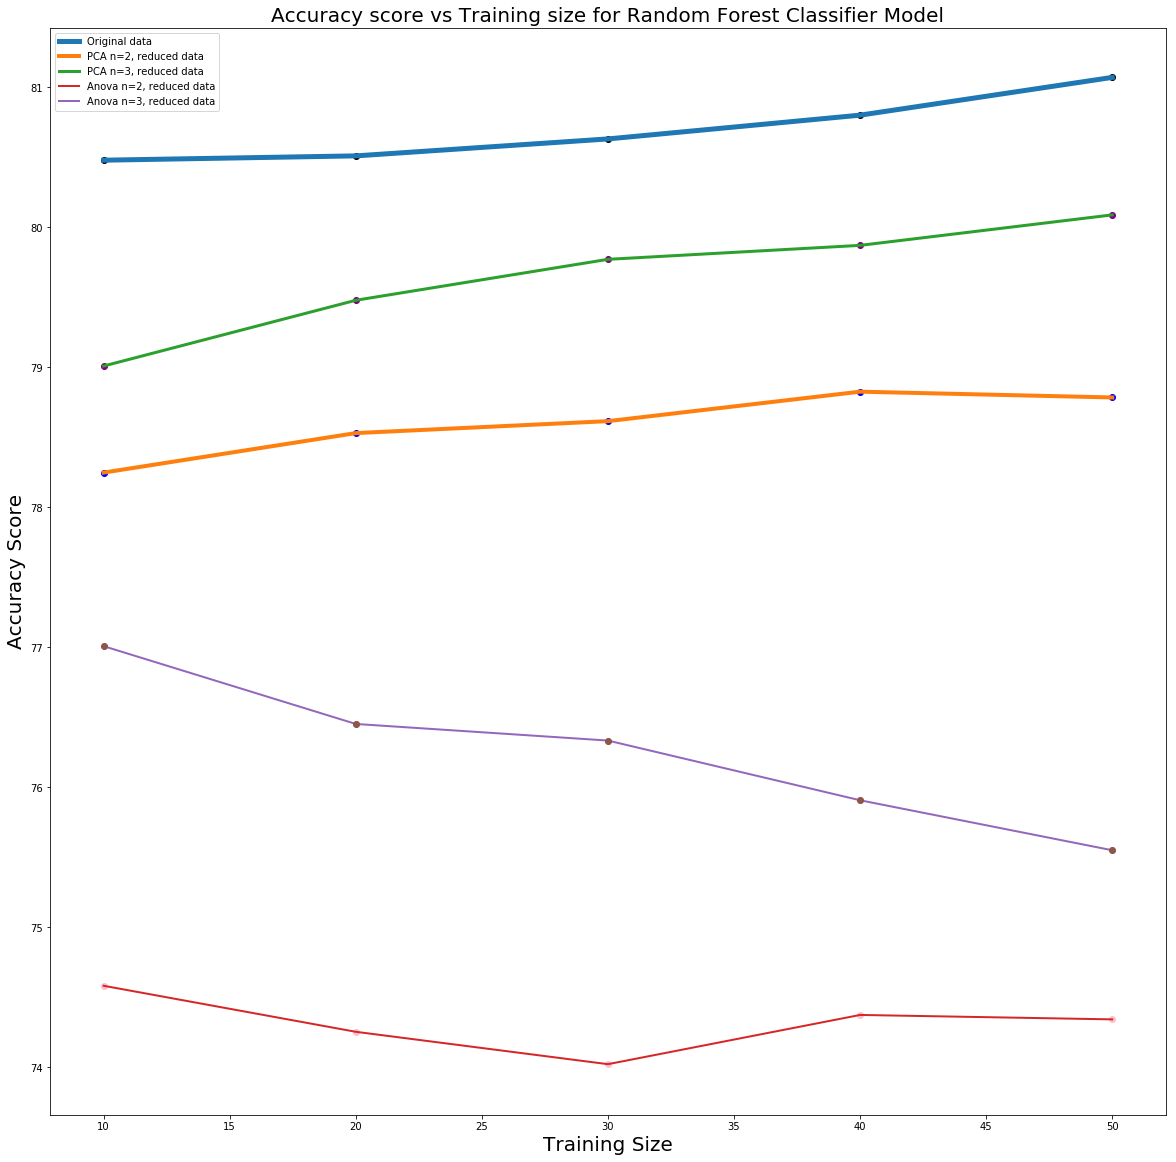

In [126]:
#Calling Logistic regression function and getting accuracy scores

print("Random Forest Classifier without dimensionality reduction")
RF_accuracy = RandomForest(X, y)

print("Random Forest Classifier with dimensionality reduced data from PCA, n=2")
RF_acc_pca_2 = RandomForest(X_pca_2, y)

print("Random Forest Classifier with dimensionality reduced data from PCA, n=3")
RF_acc_pca_3 = RandomForest(X_PCA_3, y)

print("Random Forest Classifier with ANOVA feature scaling, f = 2")
RF_acc_anova_2 = RandomForest(X_kbest_2, y)

print("Random Forest Classifier with ANOVA feature scaling, f = 3")
RF_acc_anova_3 = RandomForest(X_kbest_3, y)


# Plot outputs
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.ylabel('Accuracy Score', fontsize = 20)
plt.xlabel('Training Size', fontsize = 20)
plt.title('Accuracy score vs Training size for Random Forest Classifier Model', fontsize = 20)
plt.scatter(training_size, RF_accuracy,  color='black')
plt.scatter(training_size, RF_acc_pca_2,  color='blue')
plt.scatter(training_size, RF_acc_pca_3,  color='purple')
plt.scatter(training_size, RF_acc_anova_2,  color='pink')
plt.scatter(training_size, RF_acc_anova_3,  color='pink')


lines = plt.plot(training_size, RF_accuracy, training_size, RF_acc_pca_2, training_size, RF_acc_pca_3, training_size, RF_acc_anova_2, training_size, RF_acc_anova_3, training_size, RF_acc_anova_3, 'o')
plt.setp(lines[0], linewidth=5)
plt.setp(lines[1], linewidth=4)
plt.setp(lines[2], linewidth=3)
plt.setp(lines[3], linewidth=2)
plt.setp(lines[4], linewidth=2)


plt.legend(('Original data', 'PCA n=2, reduced data', 'PCA n=3, reduced data', 'Anova n=2, reduced data', 'Anova n=3, reduced data'),
           loc='upper left')


In [149]:
#Calling Naive Bayes function and getting accuracy scores

#Naive Bayes without dimensionality reduction
NB_accuracy = Naive_Bayes(X, y)

#Naive Bayes with dimensionality reduced data from PCA, n=2
NB_acc_pca_2 = Naive_Bayes(X_pca_2, y)

#Naive Bayes with dimensionality reduced data from PCA, n=3
NB_acc_pca_3 = Naive_Bayes(X_PCA_3, y)

#Naive Bayes with ANOVA feature scaling, f = 2
NB_acc_anova_2 = Naive_Bayes(X_kbest_2, y)

#Naive Bayes with ANOVA feature scaling, f = 3
NB_acc_anova_3 = Naive_Bayes(X_kbest_3, y)


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted

Accuracy score and Confusion matrix for 10 % is
80.95222222222222 %
[[72840     4]
 [17139    17]]
Accuracy score and Confusion matrix for 20 % is
80.8975 %
[[64697     3]
 [15279    21]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted

Accuracy score and Confusion matrix for 30 % is
80.98142857142857 %
[[56677     3]
 [13310    10]]
Accuracy score and Confusion matrix for 40 % is
80.90333333333334 %
[[48533     0]
 [11458     9]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 50 % is
80.964 %
[[40472     1]
 [ 9517    10]]
Accuracy score and Confusion matrix for 10 % is
80.98111111111112 %
[[72883     0]
 [17117     0]]
Accuracy score and Confusion matrix for 20 % is
81.01375 %
[[64811     0]
 [15189     0]]
Accuracy score and Confusion matrix for 30 % is
80.80857142857143 %
[[56566     0]
 [13434     0]]
Accuracy score and Confusion matrix for 40 % is
81.00666666666667 %
[[48604     0]
 [11396     0]]
Accuracy score and Confusion matrix for 50 % is
81.206 %
[[40603     0]
 [ 9397     0]]
Accuracy score and Confusion matrix for 10 % is
80.95777777777778 %
[[72862     0]
 [17138     0]]
Accuracy score and Confusion matrix for 20 % is
80.985 %
[[64788     0]
 [15212     0]]
Accuracy score and Confusion matrix for 30 % is
81.05 %
[[56735     0]
 [13265     0]]
Accuracy score and Confusion matrix for 40 % is
80.85833333333333 %
[[48515     0]
 [11485     0]]
Accuracy score and Confusion matrix for 50 % is
80.994 %
[[40497

C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted

80.99555555555555 %
[[72893     0]
 [17104     3]]
Accuracy score and Confusion matrix for 20 % is
80.92375000000001 %
[[64739     0]
 [15261     0]]
Accuracy score and Confusion matrix for 30 % is
80.95714285714286 %
[[56669     0]
 [13330     1]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted

Accuracy score and Confusion matrix for 40 % is
81.12833333333333 %
[[48675     0]
 [11323     2]]
Accuracy score and Confusion matrix for 50 % is
81.086 %
[[40541     0]
 [ 9457     2]]
Accuracy score and Confusion matrix for 10 % is
80.93444444444444 %
[[72841     0]
 [17159     0]]
Accuracy score and Confusion matrix for 20 % is


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted

80.9925 %
[[64792     0]
 [15206     2]]
Accuracy score and Confusion matrix for 30 % is
80.97999999999999 %
[[56685     0]
 [13314     1]]
Accuracy score and Confusion matrix for 40 % is
80.89333333333333 %
[[48536     0]
 [11464     0]]
Accuracy score and Confusion matrix for 50 % is
80.80000000000001 %
[[40400     0]
 [ 9600     0]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


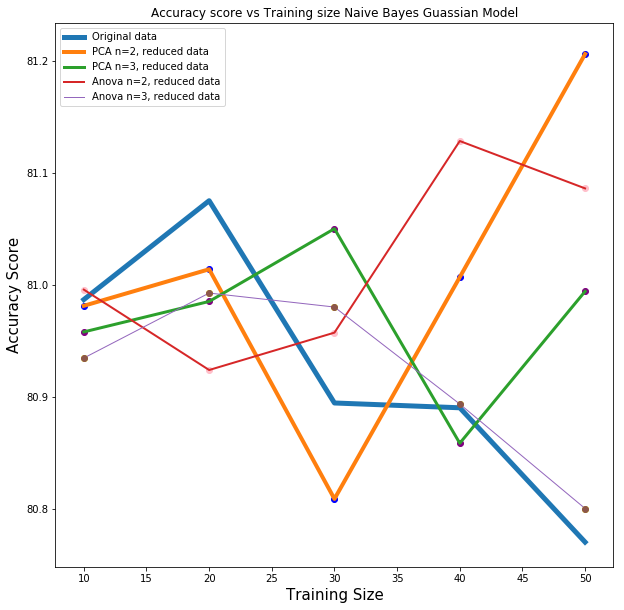

In [150]:
# Plot outputs
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.ylabel('Accuracy Score', fontsize = 15)
plt.xlabel('Training Size', fontsize = 15)
plt.title('Accuracy score vs Training size Naive Bayes Guassian Model')
plt.scatter(training_size, NB_accuracy,  color='yellow')
plt.scatter(training_size, NB_acc_pca_2,  color='blue')
plt.scatter(training_size, NB_acc_pca_3,  color='purple')
plt.scatter(training_size, NB_acc_anova_2,  color='pink')
plt.scatter(training_size, NB_acc_anova_3,  color='yellow')


lines = plt.plot(training_size, LR_accuracy, training_size, NB_acc_pca_2, training_size, NB_acc_pca_3, training_size, NB_acc_anova_2, training_size, NB_acc_anova_3, training_size, NB_acc_anova_3, 'o')

plt.setp(lines[0], linewidth=5)
plt.setp(lines[1], linewidth=4)
plt.setp(lines[2], linewidth=3)
plt.setp(lines[3], linewidth=2)
plt.setp(lines[4], linewidth=1)


plt.legend(('Original data', 'PCA n=2, reduced data', 'PCA n=3, reduced data', 'Anova n=2, reduced data', 'Anova n=3, reduced data'),
           loc='upper left')


Logistic regression without dimensionality reduction
Accuracy score and Confusion matrix for 10 % is
80.90777777777778 %
[[72806     5]
 [17178    11]]
Accuracy score and Confusion matrix for 20 % is
80.8425 %
[[64661     5]
 [15321    13]]

C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float


Accuracy score and Confusion matrix for 30 % is
81.05857142857143 %
[[56714     3]
 [13256    27]]
Accuracy score and Confusion matrix for 40 % is
80.93833333333333

C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float

 %
[[48557     1]
 [11436     6]]
Accuracy score and Confusion matrix for 50 % is
81.022 %
[[40494     9]
 [ 9480    17]]
Logistic regression with dimensionality reduced data from PCA, n=2
Accuracy score and Confusion matrix for

C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Sp

 10 % is
81.07333333333332 %
[[72956     0]
 [17034    10]]
Accuracy score and Confusion matrix for 20 % is
80.88 %
[[64704     0]
 [15296     0]]
Accuracy score and Confusion matrix for

C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 30 % is
80.97428571428571 %
[[56677     0]
 [13318     5]]
Accuracy score and Confusion matrix for 40 % is
80.945 %
[[48563     0]
 [11433     4]]
Accuracy score and Confusion matrix for 50 % is
81.094 %


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[40545     0]
 [ 9453     2]]
Logistic regression with dimensionality reduced data from PCA, n=3
Accuracy score and Confusion matrix for 10 % is
80.98111111111112 %
[[72878     0]
 [17117     5]]
Accuracy score and Confusion matrix for 20 % is
80.83375000000001 %
[[64663     0]
 [15333     4]]
Accuracy score and Confusion matrix for 30 % is
81.16285714285715 %
[[56808     0]
 [13186     6]]
Accuracy score and Confusion matrix for 40 % is
81.07333333333332 %
[[48640     0]
 [11356     4]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score and Confusion matrix for 50 % is
81.018 %
[[40507     0]
 [ 9491     2]]
Logistic regression with ANOVA feature scaling, f = 2
Accuracy score and Confusion matrix for 10 % is
80.99 %
[[72885     0]
 [17109     6]]
Accuracy score and Confusion matrix for 20 % is
80.88374999999999 %


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float

[[64700     2]
 [15291     7]]
Accuracy score and Confusion matrix for 30 % is
81.09571428571428 %
[[56764     0]
 [13233     3]]
Accuracy score and Confusion matrix for 40 % is
80.90333333333334 %
[[48539     0]
 [11458     3]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float

Accuracy score and Confusion matrix for 50 % is
80.946 %
[[40472     0]
 [ 9527     1]]
Logistic regression with ANOVA feature scaling, f = 3
Accuracy score and Confusion matrix for 10 % is
80.99444444444444 %
[[72856    41]
 [17064    39]]
Accuracy score and Confusion matrix for 20 % is
80.8775 %


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float

[[64701     0]
 [15298     1]]
Accuracy score and Confusion matrix for 30 % is
80.96571428571428 %
[[56671     3]
 [13321     5]]
Accuracy score and Confusion matrix for 40 % is
81.145 %
[[48684     2]
 [11311     3]]
Accuracy score and Confusion matrix for 50 % is
80.95400000000001 %
[[40474     0]
 [ 9523     3]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


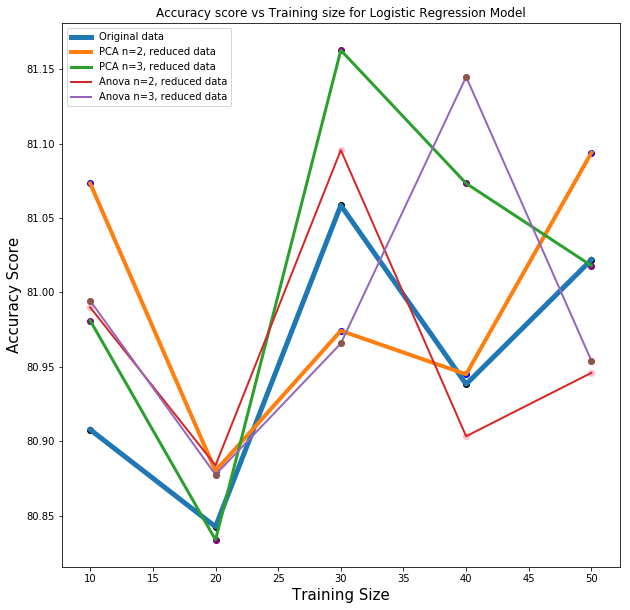

In [153]:
#Calling Logistic regression function and getting accuracy scores

print("Logistic regression without dimensionality reduction")
LR_accuracy = Logistic_Regression(X, y)

print("Logistic regression with dimensionality reduced data from PCA, n=2")
LR_acc_pca_2 = Logistic_Regression(X_pca_2, y)

print("Logistic regression with dimensionality reduced data from PCA, n=3")
LR_acc_pca_3 = Logistic_Regression(X_PCA_3, y)

print("Logistic regression with ANOVA feature scaling, f = 2")
LR_acc_anova_2 = Logistic_Regression(X_kbest_2, y)

print("Logistic regression with ANOVA feature scaling, f = 3")
LR_acc_anova_3 = Logistic_Regression(X_kbest_3, y)


# Plot outputs
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.ylabel('Accuracy Score', fontsize = 15)
plt.xlabel('Training Size', fontsize = 15)
plt.title('Accuracy score vs Training size for Logistic Regression Model')
plt.scatter(training_size, LR_accuracy,  color='black')
plt.scatter(training_size, LR_acc_pca_2,  color='blue')
plt.scatter(training_size, LR_acc_pca_3,  color='purple')
plt.scatter(training_size, LR_acc_anova_2,  color='pink')
plt.scatter(training_size, LR_acc_anova_3,  color='pink')


lines = plt.plot(training_size, LR_accuracy, training_size, LR_acc_pca_2, training_size, LR_acc_pca_3, training_size, LR_acc_anova_2, training_size, LR_acc_anova_3, training_size, LR_acc_anova_3, 'o')
plt.setp(lines[0], linewidth=5)
plt.setp(lines[1], linewidth=4)
plt.setp(lines[2], linewidth=3)
plt.setp(lines[3], linewidth=2)
plt.setp(lines[4], linewidth=2)


plt.legend(('Original data', 'PCA n=2, reduced data', 'PCA n=3, reduced data', 'Anova n=2, reduced data', 'Anova n=3, reduced data'),
           loc='upper left')


K Nearest Neighbour without dimensionality reduction


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 10 % is
76.80444444444444 %
[[66129  6695]
 [14181  2995]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 20 % is
76.685 %
[[58677  6141]
 [12511  2671]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 30 % is
76.78428571428572 %
[[51390  5215]
 [11036  2359]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 40 % is
76.69666666666667 %
[[43862  4756]
 [ 9226  2156]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 50 % is
76.836 %
[[36702  3628]
 [ 7954  1716]]
K Nearest Neighbour with dimensionality reduced data from PCA, n=2
Accuracy score and Confusion matrix for 10 % is
76.78444444444445 %
[[65986  6864]
 [14030  3120]]
Accuracy score and Confusion matrix for 20 % is
76.99875 %
[[58684  6027]
 [12374  2915]]
Accuracy score and Confusion matrix for 30 % is
76.89285714285714 %
[[51190  5540]
 [10635  2635]]
Accuracy score and Confusion matrix for 40 % is
77.16499999999999 %
[[43927  4614]
 [ 9087  2372]]
Accuracy score and Confusion matrix for 50 % is
77.41 %
[[36747  3786]
 [ 7509  1958]]
K Nearest Neighbour with dimensionality reduced data from PCA, n=3
Accuracy score and Confusion matrix for 10 % is
76.91555555555556 %
[[65769  7109]
 [13667  3455]]
Accuracy score and Confusion matrix for 20 % is
77.27374999999999 %
[[58821  6004]
 [12177  2998]]
Accuracy score and Confusion matrix for 30 % is
77.58571428571429 %
[[51536  5120]
 [10570  2774]]
Accurac

C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 10 % is
76.46222222222222 %
[[66002  6852]
 [14332  2814]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 20 % is
76.125 %
[[58238  6537]
 [12563  2662]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 30 % is
75.99428571428571 %
[[50942  5631]
 [11173  2254]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 40 % is
76.20666666666666 %
[[43818  4791]
 [ 9485  1906]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 50 % is
76.254 %
[[36470  4017]
 [ 7856  1657]]
K Nearest Neighbour with ANOVA feature scaling, f = 3


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 10 % is
76.21222222222222 %
[[65061  7836]
 [13573  3530]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 20 % is
76.3225 %
[[58058  6684]
 [12258  3000]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 30 % is
76.72428571428571 %
[[51166  5442]
 [10851  2541]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 40 % is
76.55999999999999 %
[[43579  5013]
 [ 9051  2357]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 50 % is
76.396 %
[[36250  4153]
 [ 7649  1948]]


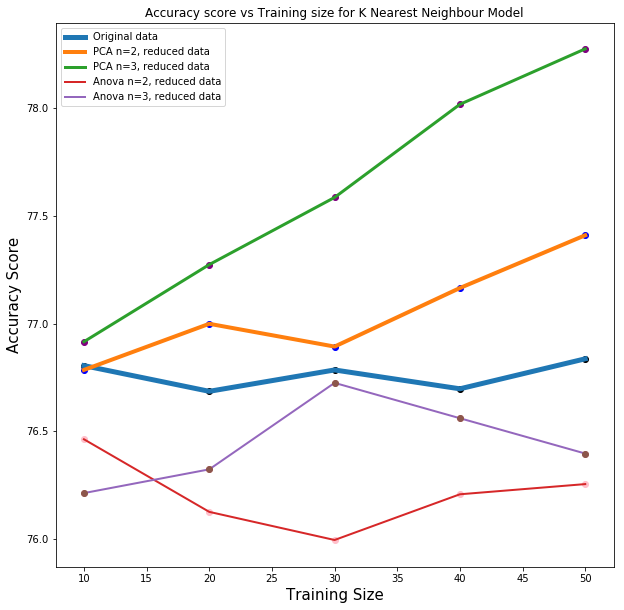

In [155]:
#Calling K Nearest Neighbour function and getting accuracy scores

print("K Nearest Neighbour without dimensionality reduction")
KNN_accuracy = K_Nearest_Neighbour(X, y)

print("K Nearest Neighbour with dimensionality reduced data from PCA, n=2")
KNN_acc_pca_2 = K_Nearest_Neighbour(X_pca_2, y)

print("K Nearest Neighbour with dimensionality reduced data from PCA, n=3")
KNN_acc_pca_3 = K_Nearest_Neighbour(X_PCA_3, y)

print("K Nearest Neighbour with ANOVA feature scaling, f = 2")
KNN_acc_anova_2 = K_Nearest_Neighbour(X_kbest_2, y)

print("K Nearest Neighbour with ANOVA feature scaling, f = 3")
KNN_acc_anova_3 = K_Nearest_Neighbour(X_kbest_3, y)


# Plot outputs
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.ylabel('Accuracy Score', fontsize = 15)
plt.xlabel('Training Size', fontsize = 15)
plt.title('Accuracy score vs Training size for K Nearest Neighbour Model')
plt.scatter(training_size, KNN_accuracy,  color='black')
plt.scatter(training_size, KNN_acc_pca_2,  color='blue')
plt.scatter(training_size, KNN_acc_pca_3,  color='purple')
plt.scatter(training_size, KNN_acc_anova_2,  color='pink')
plt.scatter(training_size, KNN_acc_anova_3,  color='pink')


lines = plt.plot(training_size, KNN_accuracy, training_size, KNN_acc_pca_2, training_size, KNN_acc_pca_3, training_size, KNN_acc_anova_2, training_size, KNN_acc_anova_3, training_size, KNN_acc_anova_3, 'o')
plt.setp(lines[0], linewidth=5)
plt.setp(lines[1], linewidth=4)
plt.setp(lines[2], linewidth=3)
plt.setp(lines[3], linewidth=2)
plt.setp(lines[4], linewidth=2)


plt.legend(('Original data', 'PCA n=2, reduced data', 'PCA n=3, reduced data', 'Anova n=2, reduced data', 'Anova n=3, reduced data'),
           loc='upper left')


SVM without dimensionality reduction


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 10 % is
80.89333333333333 %
[[72770    41]
 [17155    34]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 20 % is
80.89625000000001 %
[[64716     0]
 [15283     1]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 30 % is
80.94428571428571 %
[[56660     0]
 [13339     1]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 40 % is
81.035 %
[[48621     0]
 [11379     0]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 50 % is
81.074 %
[[40535     0]
 [ 9463     2]]
SVM with dimensionality reduced data from PCA, n=2
Accuracy score and Confusion matrix for 10 % is
81.21444444444444 %
[[72766   120]
 [16787   327]]
Accuracy score and Confusion matrix for 20 % is
81.04625 %
[[64724    38]
 [15125   113]]
Accuracy score and Confusion matrix for 30 % is
81.07857142857144 %
[[56495    97]
 [13148   260]]
Accuracy score and Confusion matrix for 40 % is
81.145 %
[[48495    76]
 [11237   192]]
Accuracy score and Confusion matrix for 50 % is
80.974 %
[[40316    73]
 [ 9440   171]]
SVM with dimensionality reduced data from PCA, n=3
Accuracy score and Confusion matrix for 10 % is
81.01222222222222 %
[[72779    42]
 [17047   132]]
Accuracy score and Confusion matrix for 20 % is
81.1325 %
[[64815    12]
 [15082    91]]
Accuracy score and Confusion matrix for 30 % is
80.88571428571429 %
[[56535    10]
 [13370    85]]
Accuracy score and Confusion matrix for 40 % is
81.21666666

C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 10 % is
80.95666666666666 %
[[72808    34]
 [17105    53]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 20 % is
80.99499999999999 %
[[64677    94]
 [15110   119]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 30 % is
80.99 %
[[56588    69]
 [13238   105]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 40 % is
80.93333333333334 %
[[48469    67]
 [11373    91]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 50 % is
80.9 %
[[40367    62]
 [ 9488    83]]
SVM with ANOVA feature scaling, f = 3


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 10 % is
80.89333333333333 %
[[72803     0]
 [17196     1]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 20 % is
80.9125 %
[[64730     0]
 [15270     0]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 30 % is
81.09428571428572 %
[[56644   105]
 [13129   122]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 40 % is
80.77 %
[[48363    75]
 [11463    99]]


C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy score and Confusion matrix for 50 % is
80.974 %
[[40412    58]
 [ 9455    75]]


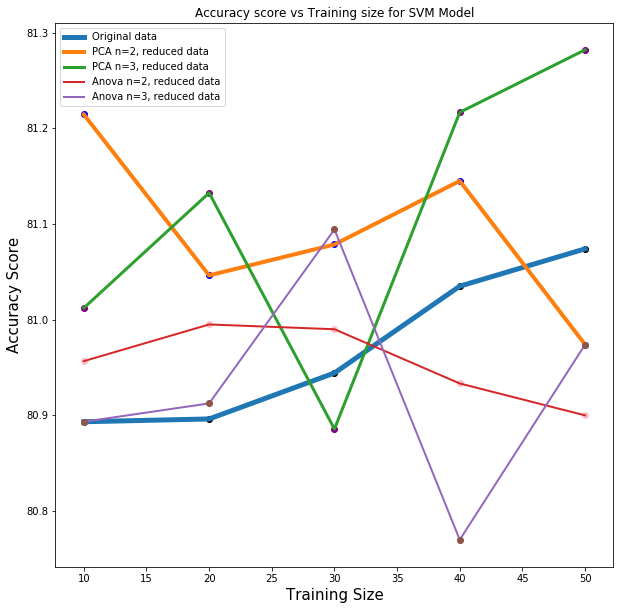

In [156]:
#Calling SVM function and getting accuracy scores

print("SVM without dimensionality reduction")
SVM_accuracy = SVM(X, y)

print("SVM with dimensionality reduced data from PCA, n=2")
SVM_acc_pca_2 = SVM(X_pca_2, y)

print("SVM with dimensionality reduced data from PCA, n=3")
SVM_acc_pca_3 = SVM(X_PCA_3, y)

print("SVM with ANOVA feature scaling, f = 2")
SVM_acc_anova_2 = SVM(X_kbest_2, y)

print("SVM with ANOVA feature scaling, f = 3")
SVM_acc_anova_3 = SVM(X_kbest_3, y)


# Plot outputs
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.ylabel('Accuracy Score', fontsize = 15)
plt.xlabel('Training Size', fontsize = 15)
plt.title('Accuracy score vs Training size for SVM Model')
plt.scatter(training_size, SVM_accuracy,  color='black')
plt.scatter(training_size, SVM_acc_pca_2,  color='blue')
plt.scatter(training_size, SVM_acc_pca_3,  color='purple')
plt.scatter(training_size, SVM_acc_anova_2,  color='pink')
plt.scatter(training_size, SVM_acc_anova_3,  color='pink')


lines = plt.plot(training_size, SVM_accuracy, training_size, SVM_acc_pca_2, training_size, SVM_acc_pca_3, training_size, SVM_acc_anova_2, training_size, SVM_acc_anova_3, training_size, SVM_acc_anova_3, 'o')
plt.setp(lines[0], linewidth=5)
plt.setp(lines[1], linewidth=4)
plt.setp(lines[2], linewidth=3)
plt.setp(lines[3], linewidth=2)
plt.setp(lines[4], linewidth=2)


plt.legend(('Original data', 'PCA n=2, reduced data', 'PCA n=3, reduced data', 'Anova n=2, reduced data', 'Anova n=3, reduced data'),
           loc='upper left')

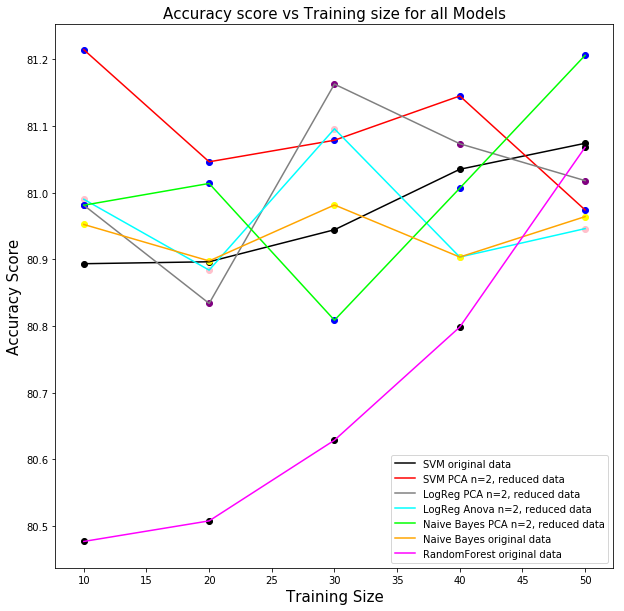

In [199]:
plt.figure(figsize=(10,10))
plt.ylabel('Accuracy Score', fontsize = 15)
plt.xlabel('Training Size', fontsize = 15)
plt.title('Accuracy score vs Training size for all Models', fontsize = 15)
plt.scatter(training_size, SVM_accuracy,  color='black')
plt.plot(training_size, SVM_accuracy,  color='black')
plt.scatter(training_size, SVM_acc_pca_2,  color='blue')
plt.plot(training_size, SVM_acc_pca_2,  color='red')
plt.scatter(training_size, LR_acc_pca_3,  color='purple')
plt.plot(training_size, LR_acc_pca_3,  color='grey')
plt.scatter(training_size, LR_acc_anova_2,  color='pink')
plt.plot(training_size, LR_acc_anova_2,  color='aqua')
plt.scatter(training_size, NB_accuracy,  color='yellow')
plt.scatter(training_size, NB_acc_pca_2,  color='blue')
plt.scatter(training_size, RF_accuracy,  color='black')

plt.plot(training_size, NB_acc_pca_2,  color='lime')
plt.plot(training_size, NB_accuracy,  color='orange')
plt.plot(training_size, RF_accuracy,  color='fuchsia')

plt.legend(('SVM original data', 'SVM PCA n=2, reduced data', 'LogReg PCA n=2, reduced data', 'LogReg Anova n=2, reduced data', 'Naive Bayes PCA n=2, reduced data', 'Naive Bayes original data', 'RandomForest original data'),
           loc='lower right')


In [ ]:

#plt.scatter(training_size, KNN_accuracy,  color='black')
#plt.scatter(training_size, KNN_acc_pca_2,  color='blue')
plt.scatter(training_size, LR_acc_pca_3,  color='purple')
plt.scatter(training_size, LR_acc_anova_2,  color='pink')
plt.scatter(training_size, NB_accuracy,  color='yellow')
plt.scatter(training_size, NB_acc_pca_2,  color='blue')
plt.scatter(training_size, RF_accuracy,  color='black')
#plt.scatter(training_size, RF_acc_pca_3,  color='purple')

lines = plt.plot(training_size, SVM_accuracy, training_size, SVM_acc_pca_2, training_size, LR_acc_pca_3, training_size, LR_acc_anova_2, training_size,
                 NB_accuracy, training_size, NB_acc_pca_2, training_size, RF_accuracy, training_size, RF_acc_pca_3, training_size, RF_acc_pca_3, 'o')

plt.setp(lines[2], linewidth=3)
plt.setp(lines[3], linewidth=2)
plt.setp(lines[4], linewidth=2)
plt.setp(lines[5], linewidth=3)
plt.setp(lines[6], linewidth=3)
#plt.setp(lines[7], linewidth=3)
#plt.setp(lines[8], linewidth=3)
#plt.setp(lines[9], linewidth=3)


plt.legend(('SVM original data', 'SVM PCA n=2, reduced data', 'LogReg PCA n=2, reduced data', 'LogReg Anova n=2, reduced data', 'Naive Bayes PCA n=2, reduced data', 'Naive Bayes original data', 'RandomForest original data'),
           loc='lower right')